<a href="https://colab.research.google.com/github/2303A52191/Explainable-AI-Assignments/blob/main/EXPLAINABLE_AI_Assignment_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fcb57df158a3330cac577fc3a7cb5bb382cdc5b0713fa95121144e960c9c4838
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
[[ 21  38]
 [ 13 128]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        59
           1       0.77      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



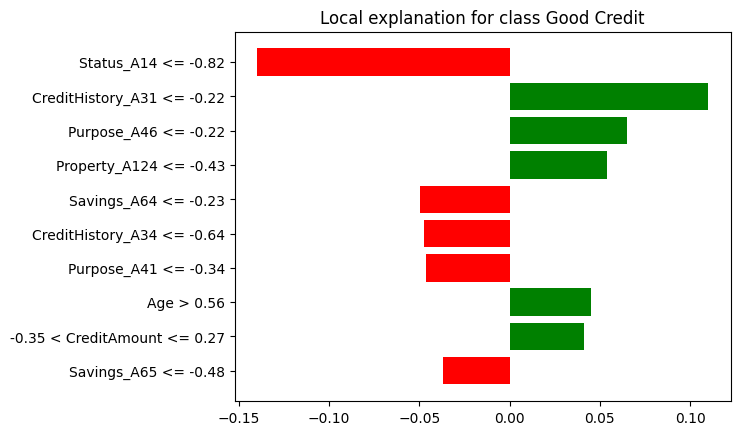

In [2]:
!pip install lime


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

url = "/content/german.data"
columns = ["Status","Duration","CreditHistory","Purpose","CreditAmount","Savings","Employment",
           "InstallmentRate","PersonalStatusSex","OtherDebtors","ResidenceSince","Property",
           "Age","OtherInstallment","Housing","ExistingCredits","Job","LiablePeople",
           "Telephone","ForeignWorker","Target"]

data = pd.read_csv(url, sep=" ", header=None, names=columns)
data["Target"] = data["Target"].map({1:1,2:0})
data = pd.get_dummies(data, drop_first=True)

X = data.drop("Target", axis=1)
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

print(confusion_matrix(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled)))

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns,
    class_names=["Bad Credit","Good Credit"],
    mode="classification"
)

i = 5
exp = explainer.explain_instance(X_test_scaled[i], model.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.show()

[[ 5 22]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        27
           1       0.68      0.90      0.78        52

    accuracy                           0.66        79
   macro avg       0.59      0.54      0.52        79
weighted avg       0.62      0.66      0.60        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


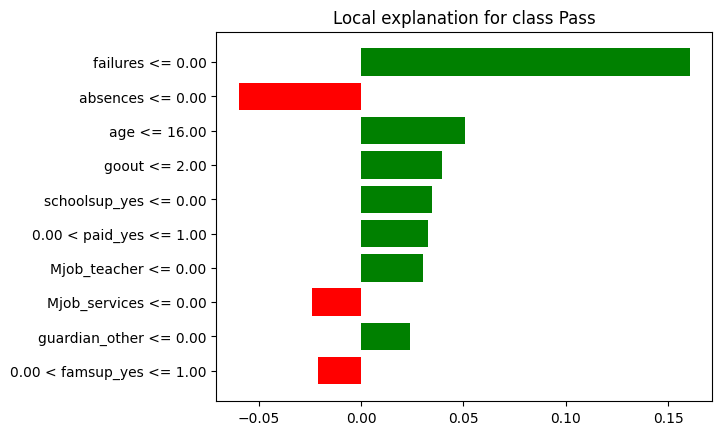

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

data = pd.read_csv("/content/student-mat.csv", sep=";")
data["Pass"] = data["G3"].apply(lambda x: 1 if x >= 10 else 0)
data = pd.get_dummies(data, drop_first=True)

X = data.drop(["Pass","G1","G2","G3"], axis=1)
y = data["Pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=["Fail","Pass"],
    mode="classification"
)

i = 10
exp = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.show()